In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import matplotlib

In [2]:
missing_marks = pd.read_csv('missingmarks_clean_data.csv')

In [3]:
missing_marks

,institution,system,data_loss_gen,data_loss_human,data_loss_machine,data_loss_hybrid,system_error_chance,feature
0,10602,1,2,3,4,1,1,2
1,10612,1,2,3,3,1,1,2
2,10597,1,2,1,1,2,1,1
3,10597,2,2,2,4,2,1,2
4,10597,1,1,1,2,1,1,1
...,...,...,...,...,...,...,...,...
10042,10592,1,1,3,2,2,2,1
10043,10607,1,2,2,2,2,1,2
10044,10627,2,2,2,2,2,2,2
10045,10627,2,2,2,2,2,2,2


In [4]:
missing_marks.shape

(10047, 8)

In [5]:
missing_marks.dtypes

institution            int64
system                 int64
data_loss_gen          int64
data_loss_human        int64
data_loss_machine      int64
data_loss_hybrid       int64
system_error_chance    int64
feature                int64
dtype: object

In [19]:
missing_marks.describe().T

,count,mean,std,min,25%,50%,75%,max
institution,10047.0,10607.570319,12.004388,10592.0,10597.0,10607.0,10617.0,10627.0
system,10047.0,1.227630,0.419323,1.0,1.0,1.0,1.0,2.0
data_loss_gen,10047.0,1.781925,0.412959,1.0,2.0,2.0,2.0,2.0
data_loss_human,10047.0,1.977904,0.668173,1.0,2.0,2.0,2.0,3.0
data_loss_machine,10047.0,1.832288,0.766250,1.0,1.0,2.0,2.0,4.0
data_loss_hybrid,10047.0,1.764905,0.424079,1.0,2.0,2.0,2.0,2.0
system_error_chance,10047.0,1.387379,0.487176,1.0,1.0,1.0,2.0,2.0
feature,10047.0,1.161740,0.368230,1.0,1.0,1.0,1.0,2.0


In [12]:
x = missing_marks.drop(columns= ['institution', 'system', 'feature'])
y= missing_marks['feature']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

In [18]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [20]:
svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(x_train_scaled, y_train)

SVC(C=1, kernel='linear', random_state=1)

In [24]:
predictions = svm.predict(x_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy = {:.3f}%' .format(accuracy*100))

Accuracy = 97.114%


In [33]:
confusion = confusion_matrix(y_test, predictions)
score = confusion.diagonal() / confusion.sum(axis =1) *100
print('Marks likley to be missing: {:.2f}%' .format(score[0]))
print('Marks not likely to be missing:  {:.2f}%' .format(score[1]))

Marks likley to be missing: 99.92%
Marks not likely to be missing:  82.33%


<AxesSubplot:>

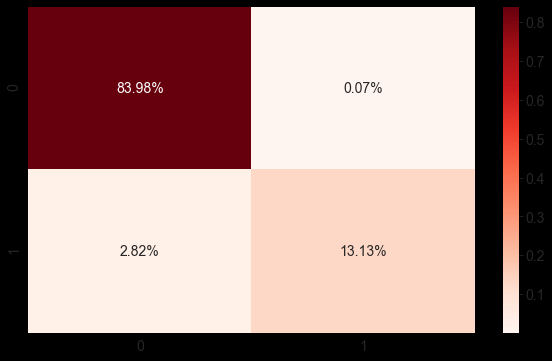

In [36]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize']  = (10, 6)
matplotlib.rcParams['figure.facecolor'] ='#000000'

sns.heatmap(confusion/np.sum(confusion), annot=True, fmt='.2%', cmap='Reds')

In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98      2534
           2       0.99      0.82      0.90       481

    accuracy                           0.97      3015
   macro avg       0.98      0.91      0.94      3015
weighted avg       0.97      0.97      0.97      3015

